# Data Cleaning for OpenFoodFacts

## Dataset Description

Dataset Description...

In [1]:
# Import libraries

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import csv

import re

import os
from pathlib import Path

In [2]:
# Parameters

path = str(Path(os.path.abspath(os.getcwd())).parent.absolute())
openfoodfactsUrl = path + '/data/en.openfoodfacts.org.products.2.csv'
foodtableUrl = path + '/data/data_2.tsv'

## Helper Functions

Helper functions...

In [3]:
# Plotting the dataset

def plotMissingValues(dataframe, width, high, character=False):
    plt.figure(figsize=(width, high)) 
    if character==False:
        ax = dataframe.isnull().sum().plot.barh(color='skyblue') 
    else:
        occurrences = (dataframe == character).sum().sort_values(ascending=True)
        ax = occurrences.plot.barh(color='skyblue') 


    # Customizing the plot

    plt.title('Missing Values per Column', fontsize=16)
    plt.xlabel('Number of Missing Values', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7) 
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Display the values on the bars
    
    if character==False:
        for i, v in enumerate(dataframe.isnull().sum()):
            ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)
    else:
        for i, v in enumerate(occurrences):
            ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

## Import Data (Chunk)

Load the data (one chunk) from a .tsv file

In [ ]:
# Load the data
chunk_size = 100000
chunks_df = pd.read_csv(openfoodfactsUrl, sep="\t", chunksize=chunk_size)

for chunk_df in chunks_df:
    print(chunk_df.shape)
    break

## Data Exploration (Chunk)

Data Exploration...

In [ ]:
# View columns name

print(chunk_df.columns.values)

chunk_df.shape

In [ ]:
# Plotting the dataset
    
plotMissingValues(chunk_df, 7, 30)

## Import Data

Load the data from a .tsv file

In [4]:
# Create the filter
# $ = keep as is | - = don't keep | ? - keep as optional | t = translate

df_filter = ["code", #$$$$$$
             "url", #$$$$$$
             "product_name", #$$$$$$
             "packaging_tags", #?t?t?t (enumerate)
             "brands", #??????
             "brands_tags", #??????
             "labels_en", #t?t?t? (da processare)
             "countries_en", #$$$$$$ (importare il dataset poi - o countries-tags)
             "ingredients_tags", #$t$t$t (tassonomia - o ingredients_text o ingredients_analysis_tags)
             "serving_size", #??????
             "additives_n", #------ Usato solo per processare additives_tags
             "additives_tags", #?????? (importare il dataset poi)
             "nutriscore_score", #??????
             "nutriscore_grade", #??????
             "nova_group", #??????
             "food_groups", #??????
             "food_groups_tags", #?????? (o food_groups_en)
             "brand_owner", #??????
             "ecoscore_grade", #??????
             #"main_category_en", #------ (sostituito da food_groups_en)
             "energy-kcal_100g", #$$$$$$
             "energy_100g", #$$$$$$
             "fat_100g", #$$$$$$$
             "saturated-fat_100g", #??????
             "trans-fat_100g", #??????
             "cholesterol_100g", #??????
             "carbohydrates_100g", #$$$$$$
             "sugars_100g", #??????
             "fiber_100g", #??????
             "proteins_100g", #$$$$$$
             "salt_100g", #??????
             "sodium_100g", #??????
             "vitamin-a_100g", #??????
             "vitamin-c_100g", #??????
             "calcium_100g", #??????
             "iron_100g"] #??????

In [5]:
filter_df = pd.read_csv(openfoodfactsUrl, sep="\t", usecols=df_filter)

C:\Users\vitto\AppData\Local\Temp\ipykernel_8812\2163774153.py:1: DtypeWarning: Columns (0,50,54,65) have mixed types. Specify dtype option on import or set low_memory=False.
  filter_df = pd.read_csv(openfoodfactsUrl, sep="\t", usecols=df_filter)


## Data Exploration

Data Exploration...

In [6]:
# View columns name

print(filter_df.columns.values)

filter_df.shape

['code' 'url' 'product_name' 'packaging_tags' 'brands' 'brands_tags'
 'labels_en' 'countries_en' 'ingredients_tags' 'serving_size'
 'additives_n' 'additives_tags' 'nutriscore_score' 'nutriscore_grade'
 'nova_group' 'food_groups' 'food_groups_tags' 'brand_owner'
 'ecoscore_grade' 'energy-kcal_100g' 'energy_100g' 'fat_100g'
 'saturated-fat_100g' 'trans-fat_100g' 'cholesterol_100g'
 'carbohydrates_100g' 'sugars_100g' 'fiber_100g' 'proteins_100g'
 'salt_100g' 'sodium_100g' 'vitamin-a_100g' 'vitamin-c_100g'
 'calcium_100g' 'iron_100g']


(3021705, 35)

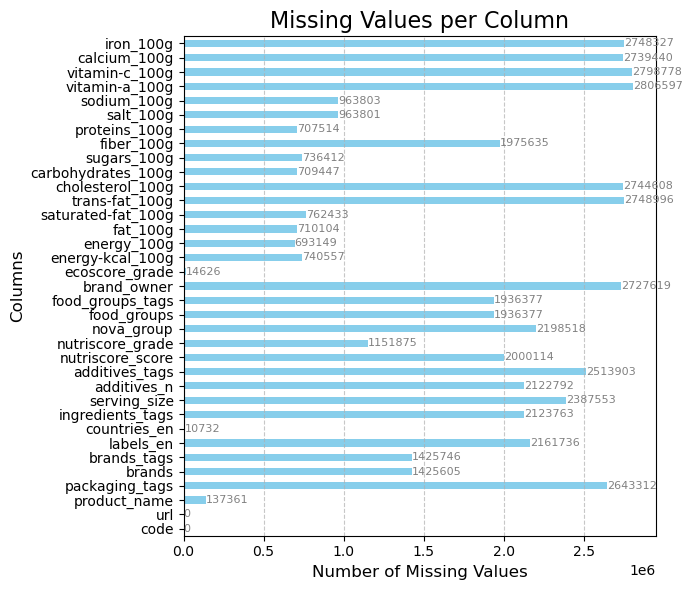

In [7]:
# Plotting the dataset
    
plotMissingValues(filter_df, 7, 6)

## Data Cleaning

Data Cleaning...

In [8]:
# Replace null values in additives_tags with empty string if additives_n is 0

def replace_null(row):
    if row['additives_n'] == 0 and pd.isnull(row['additives_tags']):
        return ""
    else:
        return row['additives_tags']
    
def replace_null_bycoll(row, col):
    if pd.isnull(row[col]):
        return ""
    else:
        return row[col]
    

filter_df['additives_tags'] = filter_df.apply(replace_null, axis=1)

filter_df["packaging_tags"] = filter_df.apply(replace_null_bycoll, args=('packaging_tags',), axis=1)
filter_df["brands"] = filter_df.apply(replace_null_bycoll, args=('brands',), axis=1)
filter_df["brands_tags"] = filter_df.apply(replace_null_bycoll, args=('brands_tags',), axis=1)
filter_df["labels_en"] = filter_df.apply(replace_null_bycoll, args=('labels_en',), axis=1)
filter_df["serving_size"] = filter_df.apply(replace_null_bycoll, args=('serving_size',), axis=1)
filter_df["nutriscore_score"] = filter_df.apply(replace_null_bycoll, args=('nutriscore_score',), axis=1)
filter_df["nutriscore_grade"] = filter_df.apply(replace_null_bycoll, args=('nutriscore_grade',), axis=1)
filter_df["nova_group"] = filter_df.apply(replace_null_bycoll, args=('nova_group',), axis=1)
filter_df["food_groups"] = filter_df.apply(replace_null_bycoll, args=('food_groups',), axis=1)
filter_df["food_groups_tags"] = filter_df.apply(replace_null_bycoll, args=('food_groups_tags',), axis=1)
#filter_df["food_groups_en"] = filter_df.apply(replace_null_bycoll, args=('food_groups_en',), axis=1)
filter_df["brand_owner"] = filter_df.apply(replace_null_bycoll, args=('brand_owner',), axis=1)
filter_df["ecoscore_grade"] = filter_df.apply(replace_null_bycoll, args=('ecoscore_grade',), axis=1)
#filter_df["main_category_en"] = filter_df.apply(replace_null_bycoll, args=('main_category_en',), axis=1)
filter_df["saturated-fat_100g"] = filter_df.apply(replace_null_bycoll, args=('saturated-fat_100g',), axis=1)
filter_df["trans-fat_100g"] = filter_df.apply(replace_null_bycoll, args=('trans-fat_100g',), axis=1)
filter_df["cholesterol_100g"] = filter_df.apply(replace_null_bycoll, args=('cholesterol_100g',), axis=1)
filter_df["sugars_100g"] = filter_df.apply(replace_null_bycoll, args=('sugars_100g',), axis=1)
filter_df["fiber_100g"] = filter_df.apply(replace_null_bycoll, args=('fiber_100g',), axis=1)
filter_df["salt_100g"] = filter_df.apply(replace_null_bycoll, args=('salt_100g',), axis=1)
filter_df["sodium_100g"] = filter_df.apply(replace_null_bycoll, args=('sodium_100g',), axis=1)
filter_df["vitamin-a_100g"] = filter_df.apply(replace_null_bycoll, args=('vitamin-a_100g',), axis=1)
filter_df["vitamin-c_100g"] = filter_df.apply(replace_null_bycoll, args=('vitamin-c_100g',), axis=1)
filter_df["calcium_100g"] = filter_df.apply(replace_null_bycoll, args=('calcium_100g',), axis=1)
filter_df["iron_100g"] = filter_df.apply(replace_null_bycoll, args=('iron_100g',), axis=1)

In [9]:
# Apply the filter to the Dataframe

food_table = filter_df[df_filter].copy()

food_table["isempty"] = np.where(food_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = food_table.isempty.value_counts()[1] / food_table.shape[0] * 100
print("Percentage of dropped rows: " + str(percentage))

food_table = food_table[food_table.isempty==0].copy()
food_table.isnull().sum()

food_table.drop("isempty", inplace=True,axis=1)
food_table.dropna(axis = 0, how = "any", inplace=True)

Percentage of dropped rows: 75.53000706554744


In [10]:
food_table.shape

(739411, 35)

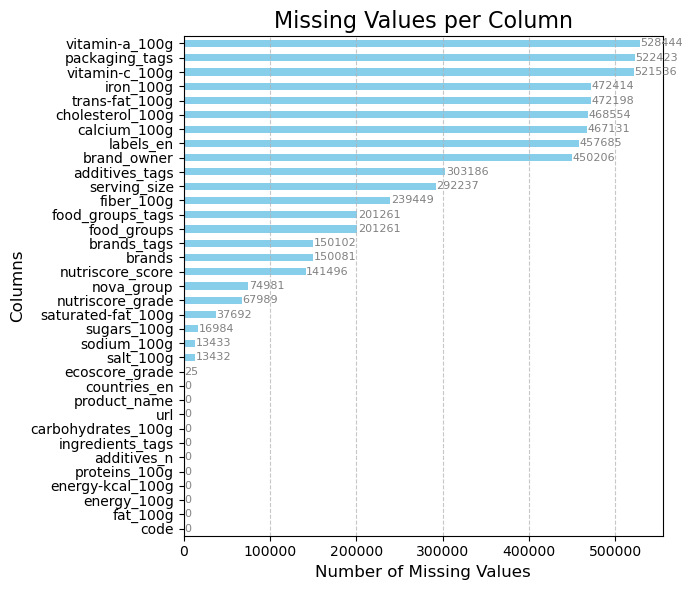

In [11]:
# Plotting the dataset
    
plotMissingValues(food_table, 7, 6, character="")

In [12]:
pd.set_option('display.max_columns', None)
food_table.head()

,code,url,product_name,packaging_tags,brands,brands_tags,labels_en,countries_en,ingredients_tags,serving_size,additives_n,additives_tags,nutriscore_score,nutriscore_grade,nova_group,food_groups,food_groups_tags,brand_owner,ecoscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
32,0000000001199,http://world-en.openfoodfacts.org/product/0000...,Solène céréales poulet,,CROUS,crous,,France,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",,5.0,"en:e150,en:e160a,en:e202,en:e316,en:e466",,unknown,4.0,,,,unknown,219.0,916.0,5.9,0.5,,,30.3,1.7,2.8,9.7,0.464,0.1856,,,,
40,0000000001663,http://world-en.openfoodfacts.org/product/0000...,Crème dessert chocolat,,Ferme De La Frémondière,ferme-de-la-fremondiere,,France,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",,1.0,en:e406,,unknown,4.0,,,,unknown,0.0,0.0,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,,,,
49,0000000002264,http://world-en.openfoodfacts.org/product/0000...,Baguette Poitevin,,Crous resto,crous-resto,,France,"fr:baguette-poite-vin-pain-baguette,en:water,e...",,0.0,,,unknown,4.0,,,,unknown,207.0,866.0,6.7,3.8,,,27.5,0.6,1.7,8.9,0.4,0.16,,,,
62,0000000003827,http://world-en.openfoodfacts.org/product/0000...,Suedois saumon,,Crous,crous,,France,"fr:paln-suedois,en:water,en:rye-flour,en:flour...",,2.0,"en:e300,en:e503",,unknown,4.0,,,,unknown,172.0,720.0,4.4,1.2,,,23.3,4.6,2.7,8.4,3.58,1.432,,,,
68,0000000004510,http://world-en.openfoodfacts.org/product/0000...,Salade shaker taboulé,,Crous,crous,,France,"fr:taboule,en:vegetable,en:colza-oil,en:oil-an...",,1.0,en:e202,,unknown,4.0,,,,unknown,114.0,477.0,8.1,0.9,,,5.7,1.4,1.7,3.9,0.31,0.124,,,,


## Save or Load the Dataset

In [13]:
# Save the new Dataset

food_table.to_csv(path + '/data/data_2.tsv', sep='\t', index=False)

In [ ]:
# Import the Dataset

food_table = pd.read_csv(openfoodfactsUrl, sep="\t")

Ingredients...

In [ ]:
ingredients_map = {}

def cl_ingredients(text, ingredients_map, debug = False):
    

    # Pattern to split the text
    
    # pattern = r"[,.()\[\]{}]"
    pattern = r"[,]"
    split_text = re.split(pattern, text)

    for ingredient in split_text:
        if ingredient in ingredients_map:
            ingredients_map[ingredient] += 1
        else:
            ingredients_map[ingredient] = 1
    
   
    if debug:
        print(text)
#        print(text)
        
    #return ', '.join(result)

#cl_ingredients(food_table.at[32, 'ingredients_tags'], ingredients_map, False)
food_table['ingredients_tags'].apply(cl_ingredients, args=(ingredients_map,))
print(len(ingredients_map))

In [ ]:
# File path to save the CSV data
file_path = path + '/data/ingrediets_2.tsv'

sorted_ingredients = dict(sorted(ingredients_map.items(), key=lambda x: x[1], reverse=True))

# Writing the dictionary to a CSV file with tab-separated values
with open(file_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['Ingredient', 'Count'])  # Writing header
    for ingredient, count in sorted_ingredients.items():
        writer.writerow([ingredient, count])

print(f"Dictionary has been written to {file_path}")

## Data Visualization

Data Visualization...

In [ ]:
# Splits the entries in a DataFrame's target column based on a specified separator, 
# creating new rows for each element resulting from the split.

def splitDataFrameList(df, target_column, separator):
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [ ]:
# Print original dataset

countries = df["countries_en"].value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
# Print new dataset

food_countries = splitDataFrameList(food_table, "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
# Print new dataset

food_countries = splitDataFrameList(food_table, "ingredients_tags", ",")
countries = food_countries["ingredients_tags"].str.split(',').explode().str.strip().value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
print(countries)

In [ ]:
countries.to_csv(path + '/data/ingredients.tsv', sep='\t', index=True)